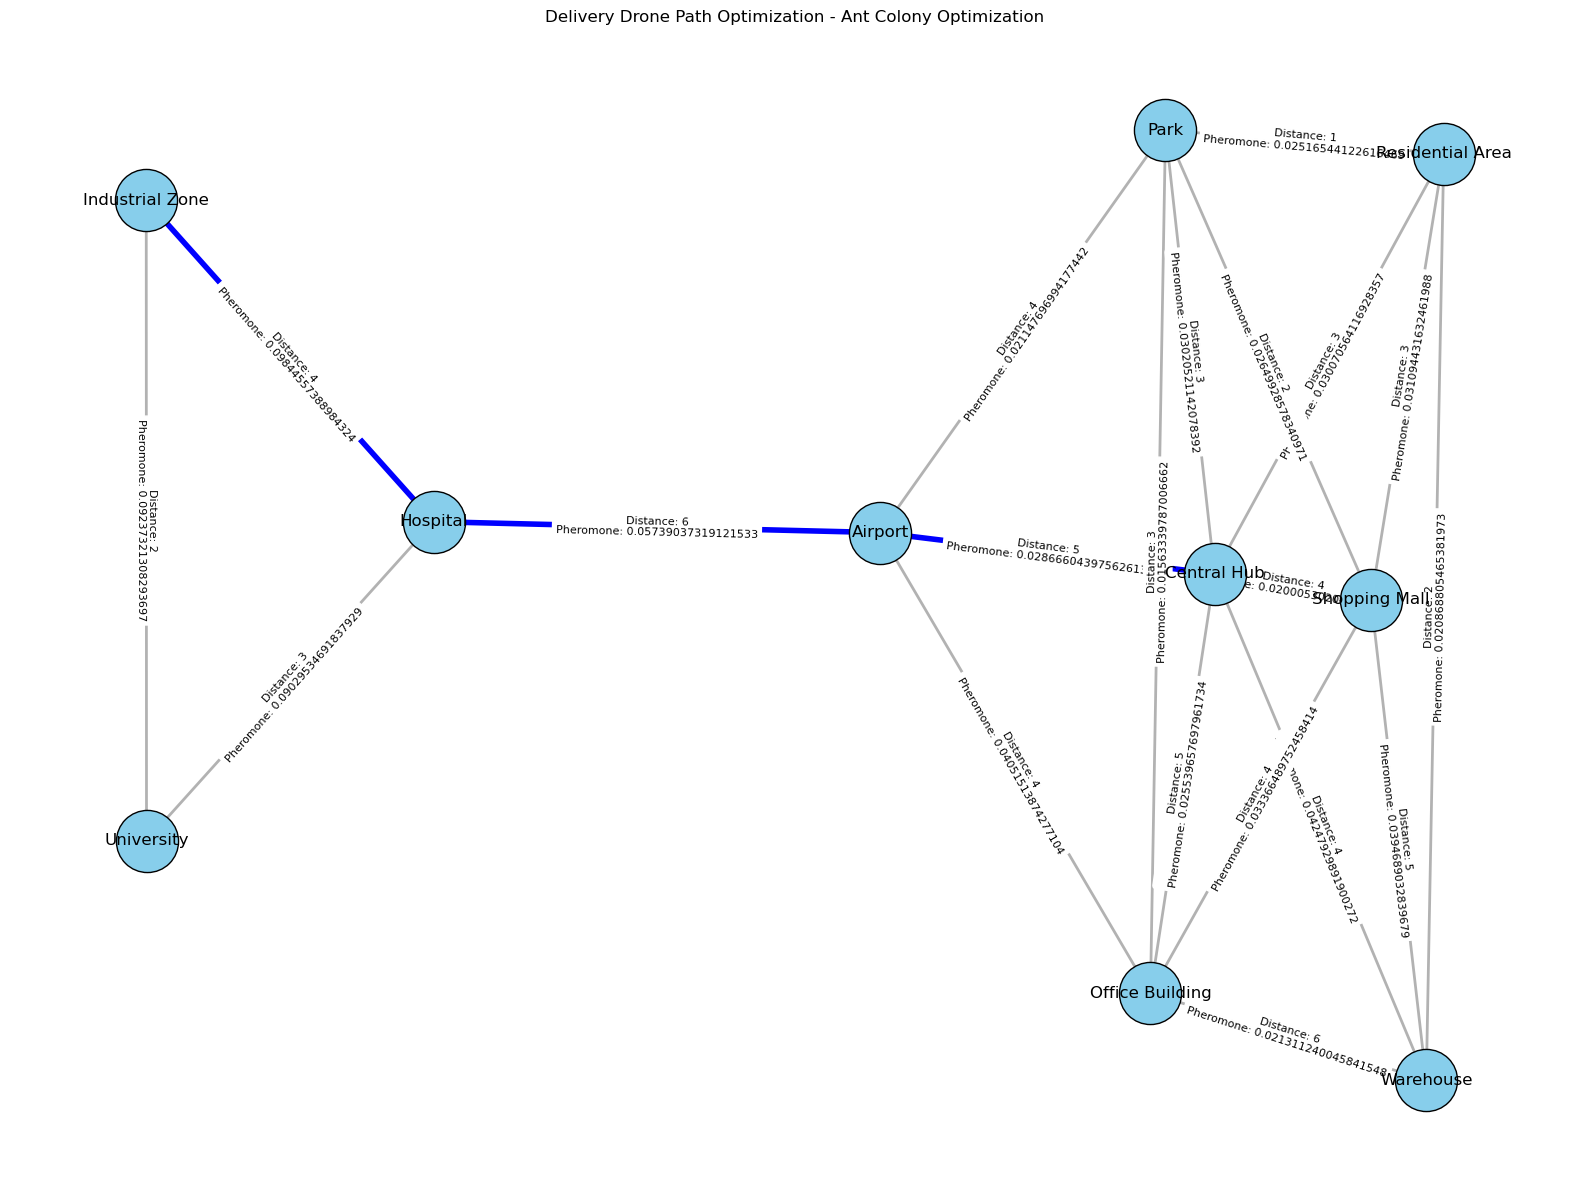

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class Ant:
    def __init__(self, graph, source, destination, alpha=1, beta=2):
        self.graph = graph
        self.source = source
        self.destination = destination
        self.alpha = alpha
        self.beta = beta
        self.path = [source]
        self.distance = 0

    def select_next_node(self):
        neighbors = list(self.graph.neighbors(self.path[-1]))
        pheromone_weights = [self.graph[self.path[-1]][neighbor]['pheromone'] ** self.alpha
                             for neighbor in neighbors]
        heuristic_weights = [1 / self.graph[self.path[-1]][neighbor]['distance'] ** self.beta
                             for neighbor in neighbors]
        probabilities = [pheromone_weights[i] * heuristic_weights[i] for i in range(len(neighbors))]
        total_probability = sum(probabilities)
        probabilities = [prob / total_probability for prob in probabilities]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        self.path.append(next_node)
        self.distance += self.graph[self.path[-2]][next_node]['distance']

    def update_pheromone(self, evaporation_rate):
        for u, v in zip(self.path[:-1], self.path[1:]):
            self.graph[u][v]['pheromone'] *= (1 - evaporation_rate)
            self.graph[u][v]['pheromone'] += 1 / self.distance

def ant_colony_optimization(graph, source, destination, num_ants=10, evaporation_rate=0.1, alpha=1, beta=2, max_iterations=100):
    ants = [Ant(graph, source, destination, alpha, beta) for _ in range(num_ants)]
    best_path = None
    best_distance = float('inf')

    for iteration in range(max_iterations):
        for ant in ants:
            while ant.path[-1] != destination:
                ant.select_next_node()
            ant.update_pheromone(evaporation_rate)
            if ant.distance < best_distance:
                best_path = ant.path
                best_distance = ant.distance
            ant.path = [source]
            ant.distance = 0

    return best_path, best_distance

# Create a graph
G = nx.Graph()

# Define locations and their coordinates
locations = {
    "Central Hub": (0, 0),
    "Warehouse": (0, 4),
    "Residential Area": (2, 1),
    "Shopping Mall": (3, 3),
    "Park": (1, 3),
    "Office Building": (4, 4),
    "Airport": (5, 0),
    "Hospital": (2, 5),
    "University": (4, 1),
    "Industrial Zone": (5, 5)
}

# Define edges between locations and their distances
edges = [
    ("Central Hub", "Warehouse", {"distance": 4}),
    ("Central Hub", "Residential Area", {"distance": 3}),
    ("Central Hub", "Shopping Mall", {"distance": 4}),
    ("Central Hub", "Park", {"distance": 3}),
    ("Central Hub", "Office Building", {"distance": 5}),
    ("Central Hub", "Airport", {"distance": 5}),
    ("Warehouse", "Residential Area", {"distance": 2}),
    ("Warehouse", "Shopping Mall", {"distance": 5}),
    ("Warehouse", "Office Building", {"distance": 6}),
    ("Residential Area", "Shopping Mall", {"distance": 3}),
    ("Residential Area", "Park", {"distance": 1}),
    ("Shopping Mall", "Park", {"distance": 2}),
    ("Shopping Mall", "Office Building", {"distance": 4}),
    ("Park", "Office Building", {"distance": 3}),
    ("Park", "Airport", {"distance": 4}),
    ("Office Building", "Airport", {"distance": 4}),
    ("Airport", "Hospital", {"distance": 6}),
    ("Hospital", "University", {"distance": 3}),
    ("University", "Industrial Zone", {"distance": 2}),
    ("Industrial Zone", "Hospital", {"distance": 4})
]

# Add nodes with coordinates to the graph
for location, coordinates in locations.items():
    G.add_node(location, pos=coordinates)

# Add edges with attributes to the graph
for source, target, edge_attrs in edges:
    G.add_edge(source, target, **edge_attrs)
    G[source][target]['pheromone'] = 1  # Initialize pheromone levels

# Run Ant Colony Optimization
best_path, best_distance = ant_colony_optimization(G, "Central Hub", "Industrial Zone")

# Plot the graph and highlight the best path
plt.figure(figsize=(16, 12))  # Set a larger figure size
pos = nx.spring_layout(G, k=0.5)  # Adjust the spring_layout parameter for better spacing

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Highlight the best path
path_edges = list(zip(best_path, best_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='blue')

# Optionally, reduce edge labels for clarity
edge_labels = {(u, v): f'Distance: {data["distance"]}\nPheromone: {data["pheromone"]}' for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Set plot title and display
plt.title("Delivery Drone Path Optimization - Ant Colony Optimization")
plt.axis('off')
plt.tight_layout()
plt.show()
